# Redwine

Namen - Studentennummer
* Quinn de Groot
* Kaai ter Horst
* Amaryllis Lee  - 1735290

### Casusopdracht
Voor deze casus moeten we een data science pipeline maken, waarbij we dataset redwine.csv analyseert. Het uitgangspunt van de analyse is een aantal onderzoeksvragen. Vervolgens doorloop je het data science proces van CRISP-DM en leg je de resultaten op een reproduceerbare manier vast in Jupyter Notebook.

### Onderzoeksvragen

Er zijn drie onderzoekesvragen beschreven, waar een verplecht is van de opdracht en 2 zelf bedacht zijn.Bovendien zijn er ook de eisen die we zullen toepassen voor elke ondezeoksvraag.

 1.	**In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?**
    1.	Toepassing van een supervised machine learning 
    2.	Correlatieonderzoek
    
2.	**Kunnen we verschillende groepen vinden van de wijnen met een hoge score op base van de chemische samenstelling?**
    1.	Toepassing van een unsupervised machine learning
    2.	Gebruik van externe dataset
    
3.	**Wat is het verband tusen de ingredienten van de wijnen en de regio's?**
    1.	Interactieve visualisatie
    2.	Toepassing van supervised learning.


## Inhoud

1. Data Understanding
    - Data Collection 
    - Data exploration & analysis
2. Data Preparation
    - Data munging
    - Data cleaning
3. Data Analyses
    - Analyse oderzoeksvraag 1
    - Analyse onderzoeksvraag 2
    - Analyse onderzoeksvraag 3


## Data Understanding 

### Data Collection 
In de Data Collection zullen de libraries gaan importeren, de toegewezen datasets en de externe dataset gaan inlezenen bekijken.
De bron voor de externe dataset: https://www.kaggle.com/piyushgoyal443/red-wine-dataset

#### Libraries importeren 

In [230]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Datasets inlezen en verkennen 

In [3]:
# load dataset redwine.csv
df = pd.read_csv('redwine.csv',encoding  = "cp1252", delimiter = ';')
# De attributen van de dataset  bekijken
df.describe()

,id,points,price,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates
count,2465.000000,2465.000000,2196.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,1233.089655,88.811359,24.819217,8.352819,0.528162,2.562353,0.087485,15.804665,47.218661,3.311201,0.660353
std,711.869967,2.974000,25.539475,1.734847,0.178869,1.407030,0.047043,10.379218,33.187830,0.153927,0.172531
min,1.000000,81.000000,5.000000,4.600000,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000
25%,617.000000,87.000000,12.000000,7.100000,0.400000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000
50%,1233.000000,88.000000,17.000000,7.900000,0.520000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000
75%,1849.000000,91.000000,28.000000,9.300000,0.635000,2.600000,0.091000,21.000000,64.000000,3.400000,0.730000
max,2466.000000,100.000000,450.000000,15.900000,1.580000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000


In [3]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

### Data exploration

Er zal in de data redwine.csv ( **df** ) de *features* word bekeken.Er wordt gezien of de *feautures* in de dataset compleet is en goed is voor het oplossen van de onderzoeksvragen 

In [4]:
# Dimensie bekijken van df 
df.shape 

(2465, 22)

In [5]:
# Return een lijst van de features in de dataset
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [6]:
# De datypes voor elke feature
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

In [7]:
#Bekijk de waardes van de features.
df.head(5)

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4



- Numerieke features:  
    - id
    - points 
    - price
    - fixed_acidity
    - volatile acidity
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - pH 
    - sulphates
    - alcohol
- Characters (string) Features
    - country                  # moet verwijdert worden, alle waarden = Portugal
    - description              
    - designation               
    - province                 
    - taster_name              
    - title                    
    - variety                  # moet verwijderd worden
    - winery                   
    
  

In [8]:
print(df['variety'].unique()) # Er is te zien dat alle wijnen zij Portuguese Red, dus dit kolom kunnen we verwijderen .
print(df['country'].unique()) # Er is te zien dat alle wijnen zij Portugal, dus dit kolom kunnen we verwijderen.

['Portuguese Red']
['Portugal']


Alle features die de datatype object heeft, moet de volgende datatypes hebben.
! : features die we gaan gebruiken om onderzoeksvragen op te lossen.
* country                  object 
* description              object 
* designation              object
* province                 object 
* taster_name              object 
* title                    object
* variety                  object  
* winery                   object  
* citric acid              object - float!
* density                  object - float!
* alcohol                  object - float!

In [9]:
df['citric acid'].head(10)

0      0.4
1     0.37
2     0.07
3     0.07
4     0.34
5     0.42
6     0.43
7     -   
8     0.41
9     0.07
Name: citric acid, dtype: object

In [88]:
# de datatypes van de nodige features veranderen 
# we gebruiken errors = 'coerce' om alle invalid parsing naar NaN te zetten.
df['citric acid'] = pd.to_numeric(df['citric acid'], errors = 'coerce')
df['density']     = pd.to_numeric(df['density'], errors = 'coerce')
df['alcohol']     = pd.to_numeric(df['alcohol'], errors = 'coerce')

In [89]:
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

#### Missend waardes
Er wordt bekeken of er missend waardes zijn in de kolommen. Verder wordt deze missend waardes verwerkt of verwijdert.

In [12]:
df.isnull().sum()

id                        0
country                   0
description               0
designation             153
points                    0
price                   269
province                  0
taster_name               0
title                     0
variety                   0
winery                    0
fixed acidity             0
volatile acidity          0
citric acid             203
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   1
pH                        0
sulphates                 0
alcohol                  10
dtype: int64

Aan de hand van de data exploration, kunnen we de volgende kolommen verwijderen:
* country : Deze kolom bevat alleen de waarde Portugal, we kunnen concluderen dat alle wijen komt van Portugal
* variety : Deze kolom bevat alleen de waarde Portuguese Red
* designation  en price: Deze kolommen zullen we niet gaan gebruiken om onze onderzoeksvragen op te lossen en ze  bevatten veel NaN waarden. 

In [13]:
#kolommen verwijderen 
df = df.drop(['country'], axis = 1)
df = df.drop(['variety'], axis = 1)
df = df.drop(['designation'], axis = 1)
df = df.drop(['price'], axis = 1)

### Data  analysis
*In deze sectie worden een analyse uitgevoerd op de dataset voor de onderzoeksvragen*
Hier worden gekeken naar de 

#### Analyse  onderzoeksvraag 3: 
<!-- In deze analyse gaan we de unieke aantal wijnen per regio bepalen. Hiermee kunnen we een steekproef nemen van de provincie die minstens een aantal wijnen bevatten. -->

In [14]:
#informatie halen van kolom 'province'
df['province'].describe() 

count      2465
unique       30
top       Douro
freq        880
Name: province, dtype: object

Uit de bovenstaande code kunnen we de onderstaande informatie uithalen:
* count : Er zijn 2456 regio's
* unique : Uit de 2456 regio's zijn er 30 unieke regio's
* top : Duoro's is de meeste voorkomende regio
* freq : De regio komt voor 880 keer in de kolom

In [266]:
#aantal wijnen per regio
wijnen_regios = df.groupby(df['province'].loc[df['points'] > 0]).count()['title']

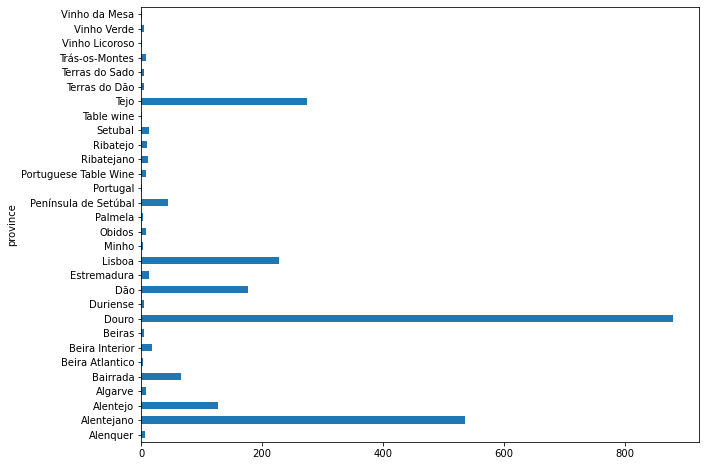

In [267]:

plt.figure(figsize = (10,8) )
wijnen_regios.plot(kind = 'barh', stacked = True)

In [41]:
# aantal unieke wijnen per regio bepalen
unieke_wijnen = list(df.groupby(df['title'].loc[df['points'] > 0]).count()['province'])
unieke_regios = [str(i) for i in df['province'].unique()] # zet alle unieke regio's in een lijst

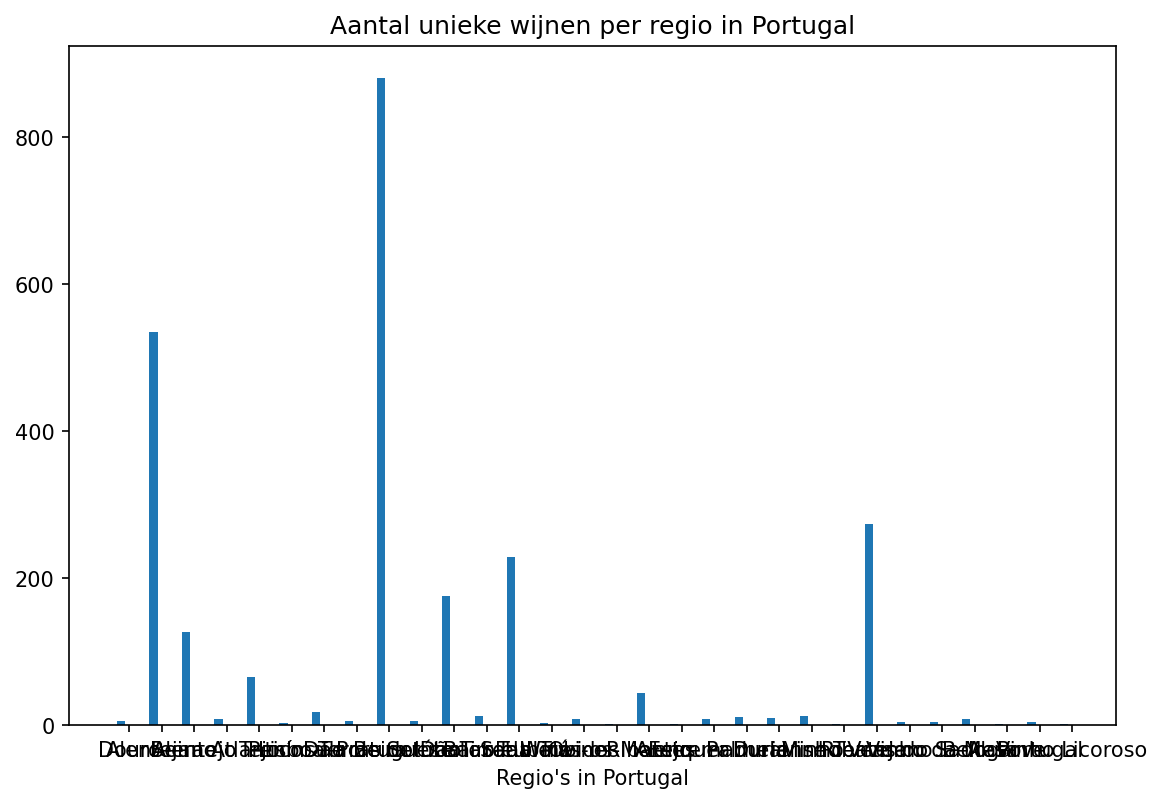

In [44]:
 #visualiseer in een staaf diagram
bar_width = 0.25

plt.figure(figsize = (9,6), dpi=150)

#Data 
index = np.arange(len(df['province'].unique()))  # the label locations
plt.bar(index, unieke_wijnen, bar_width)

#Assen 
plt.title('Aantal unieke wijnen per regio in Portugal')
plt.xlabel('Regio\'s in Portugal')
plt.xticks(index + bar_width,unieke_regios)

#TODO : alle x cpprdinaten (regio's) in de grafiek laten tonen.

plt.show()

Deze grafiek geeft de aantal unieke wijnen per regio. 
Elke bar geeft een provincie aan.
Hiermee kunnen we zien welke provincies kunnen  we nemne als selectie om onze onderzoeksvragen op te lossen.

Aan de hand van de grafieken, nemen we een selectie van alle regio's die meer dan 10 wijnen hebt.

#### Analyse  onderzoeksvraag 2: 

1. Externe dataset
3. boxplot voor elke chemische samenstelling

In [19]:
# minimum - maximum points
print("Mininum punten " + str(df['points'].min()))
print("Maximum punten " + str(df['points'].max()))
#gemiddelde van kolom points
print("Gemiddelde punten " + str(df['points'].mean()))

Mininum punten 81
Maximum punten 100
Gemiddelde punten 88.81135902636917


In [20]:
len(df[df['points'] > 88.81135902636917]) # er zijn 1217 rijen die boven de gemiddele scoren.

1217

In [21]:
#Kijk de aantal verschillende wijnen die boven de gemiddelde scoren
len(list(set(df['title'].loc[df['points'] > 88.81135902636917])))

1136

In [22]:
list(set(df['title'].loc[df['points'] > 88.81135902636917])) # alle namen van de wijnen die een boven gemiddelde score heeft.

['Wines & Winemakers 2014 Azul Portugal Red (Tejo)',
 'Dão Sul 2012 Quinta do Encontro Q do E Red (Bairrada)',
 'Falua 2006 Conde de Vimioso Red (Ribatejano)',
 'Quinta de Foz de Arouce 2013 Red (Beira Atlantico)',
 'Companhia das Quintas 2012 Herdade da Farizoa Reserva Red (Alentejo)',
 'Quinta da Romaneira 2013 Reserva Red (Douro)',
 'Quinta das Marias 2014 Cuvée TT Reserva Red (Dão)',
 'Terras de Alter 2009 Outeiro Red (Alentejano)',
 'Global Wines 2014 Q do E Encontro Preto Branco Reserva Red (Bairrada)',
 'Quinta das Tecedeiras 2005 Reserva Red (Douro)',
 'Fitapreta Vinhos 2011 Preta Red (Alentejano)',
 "Churchill's 2010 Churchill Estates Red (Douro)",
 'Quinta das Marias 2014 Lote Red (Dão)',
 'Mouchão 2010 Dom Rafael Tinto Red (Alentejo)',
 'Aveleda 2013 Charamba Reserva Red (Douro)',
 'Mouchão 2012 Red (Alentejo)',
 '1912 Winemakers 2009 Encosta do Bocho Grand Reserva Red (Douro)',
 'Caves Aliança 2007 Quinta das Baceladas Red (Bairrada)',
 'Dona Maria-Júlio Bastos 2011 Dona Ma

In [23]:
# informatie halen van de wijnen met een hoge score ten op zichte van de provincies.
df.groupby(df['province'].loc[df['points'] > 88.81135902636917]).count() 

,id,description,points,province,taster_name,title,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
province,,,,,,,,,,,,,,,,,,
Alenquer,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Alentejano,230,230,230,230,230,230,230,230,230,216,230,230,230,230,229,230,230,229
Alentejo,69,69,69,69,69,69,69,69,69,64,69,69,69,69,69,69,69,69
Algarve,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Bairrada,34,34,34,34,34,34,34,34,34,27,34,34,34,34,34,34,34,34
Beira Atlantico,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Beira Interior,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Beiras,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Douro,536,536,536,536,536,536,536,536,536,494,536,536,536,536,536,536,536,532


In [24]:
#df.groupby(df['province'].loc[df['title'].unique()]).count()

In [25]:
df.groupby(df['taster_name'].loc[df['points'] > 0]).mean()['points'] # nu zien we dat alle wijn experts ongeveer dezelfde scor heeft en daardoor unbiased zijn.

taster_name
Alexander Peartree    88.500000
Anna Lee C. Iijima    88.892857
Anne Krebiehl MW      88.090909
Carrie Dykes          85.333333
Fiona Adams           88.666667
Jeff Jenssen          87.111111
Jim Gordon            88.710280
Joe Czerwinski        88.650350
Kerin O’Keefe         88.740310
Lauren Buzzeo         88.552632
Matt Kettmann         89.057143
Michael Schachner     89.054688
Mike DeSimone         89.600000
Paul Gregutt          88.899083
Roger Voss            88.779365
Sean P. Sullivan      88.648000
Susan Kostrzewa       89.068966
Virginie Boone        88.845455
Name: points, dtype: float64

In [26]:
# de verschil van de gemiddelde ingredienten per provincie.
df.groupby('province')[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' ]].mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
province,,,,,,,,,,,
Alenquer,8.333333,0.605000,0.256000,2.266667,0.078000,20.833333,63.666667,0.997268,3.308333,0.618333,9.833333
Alentejano,8.394766,0.545981,0.287267,2.500187,0.088938,15.149533,45.617757,2.296018,3.307944,0.644131,10.286985
Alentejo,8.106349,0.531310,0.279076,2.519444,0.088492,17.880952,51.039683,1.425535,3.329603,0.664206,10.480800
Algarve,8.400000,0.561875,0.185000,2.262500,0.072125,22.750000,67.750000,2.122829,3.318750,0.600000,9.700000
Bairrada,8.127273,0.524091,0.283621,2.360606,0.084894,17.621212,56.954545,2.497035,3.342727,0.653939,10.256061
Beira Atlantico,7.266667,0.540000,0.123333,2.266667,0.091667,15.666667,30.666667,0.995867,3.373333,0.603333,10.933333
Beira Interior,8.505556,0.435833,0.312941,2.344444,0.093833,12.222222,29.944444,0.996457,3.277778,0.727222,10.566667
Beiras,9.580000,0.383000,0.396000,2.190000,0.078000,12.600000,43.400000,0.997308,3.262000,0.670000,10.420000
Douro,8.381705,0.510392,0.311936,2.555909,0.087216,15.201705,44.635227,1.970435,3.310102,0.674341,10.569692


Boxplot tekenen van alle chemische samenstelling

In [27]:
# functie om ene boxplot te tekenen
def boxplot_tekenen(n,X):
    fig1, ax1 = plt.subplots()
    ax1.set_title(n)
    ax1.boxplot(X)

None
None
None
None


/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


None
None
None


/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


None
None
None
None


/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Users/quinndegroot/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


[None, None, None, None, None, None, None, None, None, None, None]

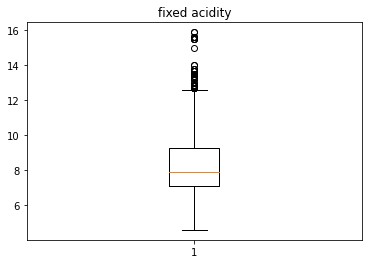

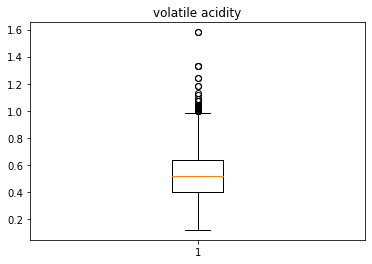

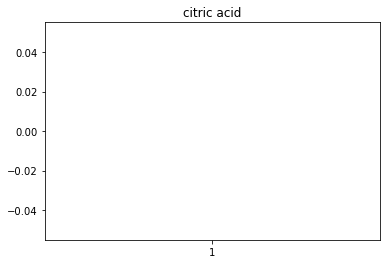

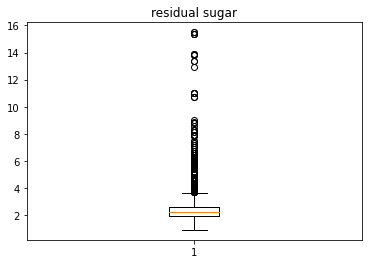

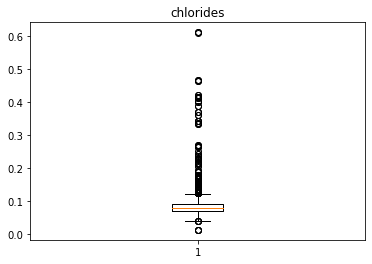

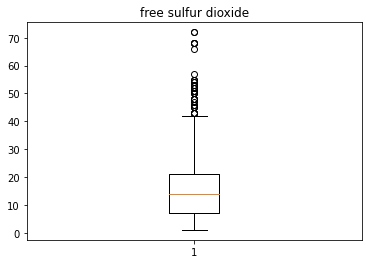

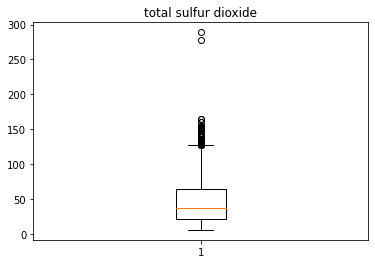

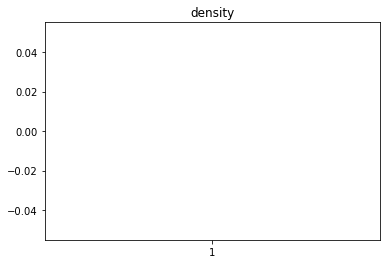

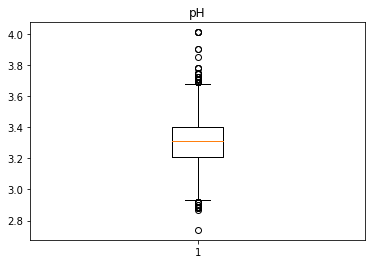

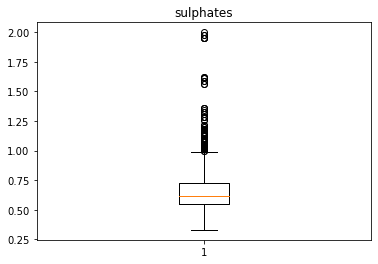

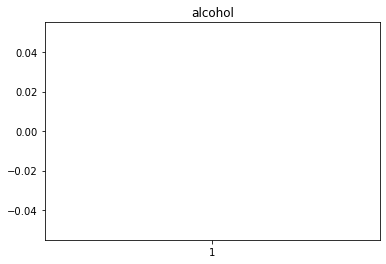

In [28]:
[print(boxplot_tekenen(i, list(df[i]))) for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

Aan de hand van deze boxplotten van de chemische samenstelling is te zien dat er zijn een aantal chemische samenstelling die we kunnen gebruiken om clustering toe te passen.
We kunnen deze analyse ook voor onderzoeksvraag 1 gebruiken. De bovenstaande informatie vertelt ons dat we kunnnen een aantal chemische samenstelling gebruiken om de score van een Portuguese Red te voorspellen.

#### Analyse  onderzoeksvraag 1: 

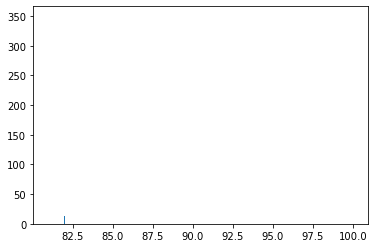

In [29]:
# Histogram plotten van de score van de Portugues Red

yb = list(df['points'])
plt.hist(yb,bins=len(yb))   
plt.show()

In [30]:
#TODO : histogram plotten van de verdelingvan de score om outliers te zien 
#TODO : boxplotten , wat betekent None voor de oplssing van de onderzoeksvragen.
#TODO : de verschil van de gemiddelde ingredienten per provincie plotten ??

### Onderzoeksvraag 3

Bij onderzoeksvraag 3 zijn de variabelen die handig te gebruiken zijn de regio's, de chemische componenten, en de namen van de wijnen zelf. Als we deze variabelen op de juiste manier kunnen verwerken kunnen we aan de hand daarvan zien of er overeenkomsten zijn tussen de chemishe componenten van de wijnen en de regio's zelf.

Het meetniveau van de regio's is nominaal, omdat je de verschillen tussen deze variabelen niet kan aanduiden maar ze zijn wel andere variabelen. Het meetniveau van de chemische componenten is interval, omdat de variabelen even groot veschillen maar wat de impact hiervan is is niet duidelijk. Ten slot is het meetniveau van de namen ook nominaal, omdat de verchillen hiervan ook niet aan te duiden zijn.

De modellen die geschikt zijn voor het aanduiden van de variabelen zijn de barchart en de bubblechart. Dit is omdat je per regio per wijn per chemisch component het beste kan vergelijken met een bubblechart, en wanneer je het gemiddelde van het chemische component van alle wijnen per regio wil vergelijken je dat het beste kan doen met een barchart.

Normalisering is in deze data niet echt mogelijk, omdat al de data per chemisch component per regio geanalyseert wordt, en hierdoor ook deels genormaliseert wordt.

#### Correlatie

De relatie van de gemiddelde chemische componenten en de regio's is heel erg verschillend: Bij de een is er heel veel verschil en bij de ander bijna niet.

In [269]:
# We kunnen kijken bij de chlorides en de sulfur dioxides kijken wat hiermee wordt bedoelt.
gemiddelde_chlorides = df.groupby('province')['chlorides'].mean()
gemiddelde_sulfur_dioxide = df.groupby('province')[['free sulfur dioxide', 'total sulfur dioxide']].mean()

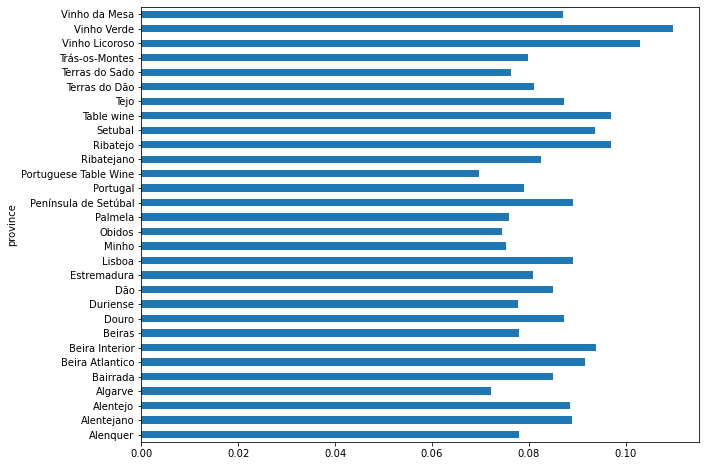

In [270]:
# Zoals te zien is is het verschil tussen de chlorides per provinties minimaal verschil, 
# waardoor deze eigenlijk te verwaarlozen is
gemiddelde_chlorides.plot.barh(rot=0, figsize = (10,8))

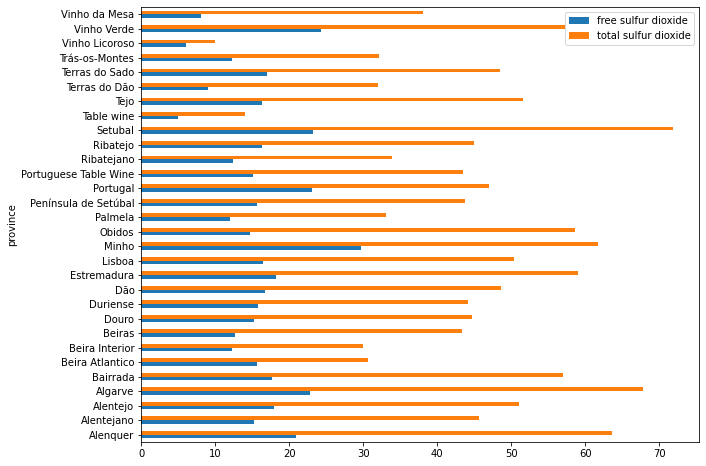

In [271]:
# Maar zoals je kan zien bij de sulfur dioxides is het verschil hiertussen veel groter, 
# waardoor dit eventueel een relatie kan hebben met de regio waar de wijn in is geproduceert.
gemiddelde_sulfur_dioxide.plot.barh(rot=0, figsize = (10,8))

Het is misschien niet met elk component, maar je kan wel zeggen dat er enige correlatie is tussen de chemische componenten en de regios.

In [272]:
df2 = pd.DataFrame()
df2['province'] = df['province']
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    df2[i] = (df[i]-df[i].mean())/df[i].std()
df2.head()

,province,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,Douro,0.949468,-1.331489,0.542608,0.239972,0.223513,-0.559258,-0.639351,0.827454,1.096616,1.446967,-0.678378
1,Alentejano,-0.030446,-1.499210,0.380756,-0.826104,-0.244140,-0.751951,-0.729745,-0.126196,-0.332630,0.229796,-0.773452
2,Alentejo,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812
3,Beira Atlantico,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812
4,Alentejano,-0.203372,-0.269260,0.218904,-0.257530,-0.307911,0.018820,-0.669482,-0.126599,-0.202698,-0.002046,1.888630


In [273]:
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

#### Model

In [274]:
gemiddelde = df.groupby('province')[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' ]].mean()

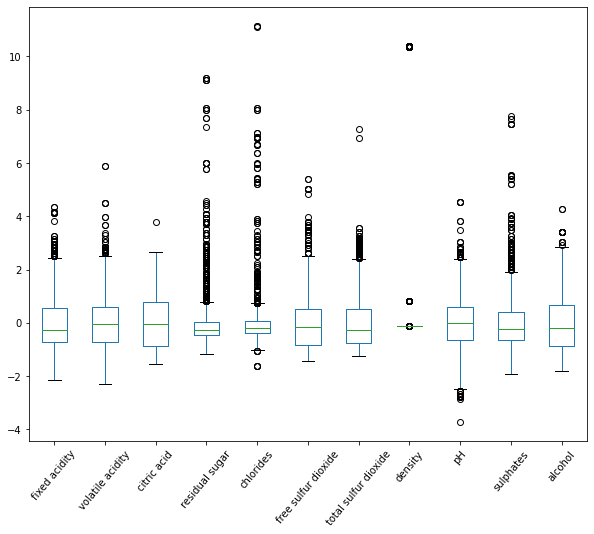

In [275]:
df2.plot.box(rot = 50, figsize = (10,8))

In [276]:
# knn.fit(x_train, y_train)

In [277]:
df2 = df2.fillna(0)

In [278]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(df2.loc[:,'province':]))
# print(z)

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 5)

In [280]:
x = df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df2['province']

In [281]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

print(f'{len(x_train)} trainwaarden, {len(x_test)} testwaarden: {len(x_train)*100/len(df2):.1f}%/{len(x_test)*100/len(df2):.1f}%')

1848 trainwaarden, 617 testwaarden: 75.0%/25.0%


In [282]:
# x_train.isnull().sum()
#citric acid, density en alcohol bevatten null waardes

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [283]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [284]:
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.2965964343598055

In [285]:
provinces = df2['province'].unique()

In [286]:
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, 
                     index =[provinces[i] for i in range(24)], 
                     columns = [provinces[i] for i in range(24)])
print(cm)
df_cm

[[  0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  64   3   0   1   0   0   0  57   0   6   0   3   0   0   1   0   0
    0   0   0   2   0   0]
 [  0   5   0   0   0   0   0   0  17   0   2   0   2   0   0   0   0   0
    0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0  12   0   0   0   2   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  79   8   0   0   0   1   0 113   0   0   0   5   0   0   0   0   0
    0   0   0   8   0   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0
    0   0   0   0

,Douro,Alentejano,Alentejo,Beira Atlantico,Tejo,Lisboa,Dão,Península de Setúbal,Terras do Dão,Beira Interior,...,Obidos,Trás-os-Montes,Ribatejo,Alenquer,Estremadura,Palmela,Duriense,Minho,Vinho Verde,Ribatejano
Douro,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alentejano,0,64,3,0,1,0,0,0,57,0,...,0,1,0,0,0,0,0,2,0,0
Alentejo,0,5,0,0,0,0,0,0,17,0,...,0,0,0,0,0,0,0,2,0,0
Beira Atlantico,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Tejo,0,4,0,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
Lisboa,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dão,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Península de Setúbal,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Terras do Dão,0,79,8,0,0,0,1,0,113,0,...,0,0,0,0,0,0,0,8,0,0
Beira Interior,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


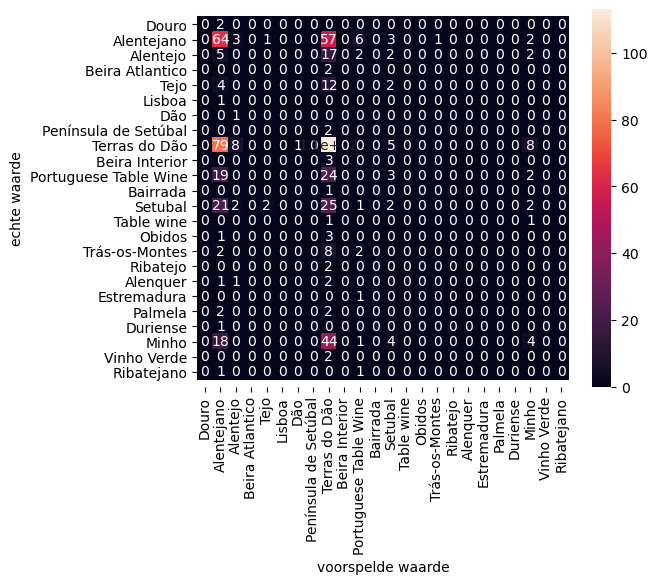

In [287]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

ax = sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('voorspelde waarde')
ax.set_ylabel('echte waarde')

plt.show()

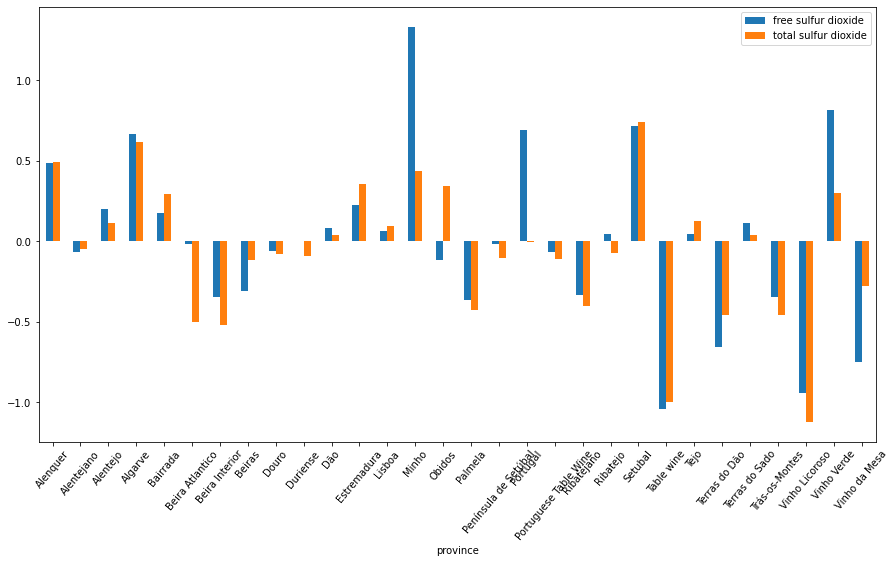

In [288]:
az.plot.bar(rot=50, figsize = (15,8))

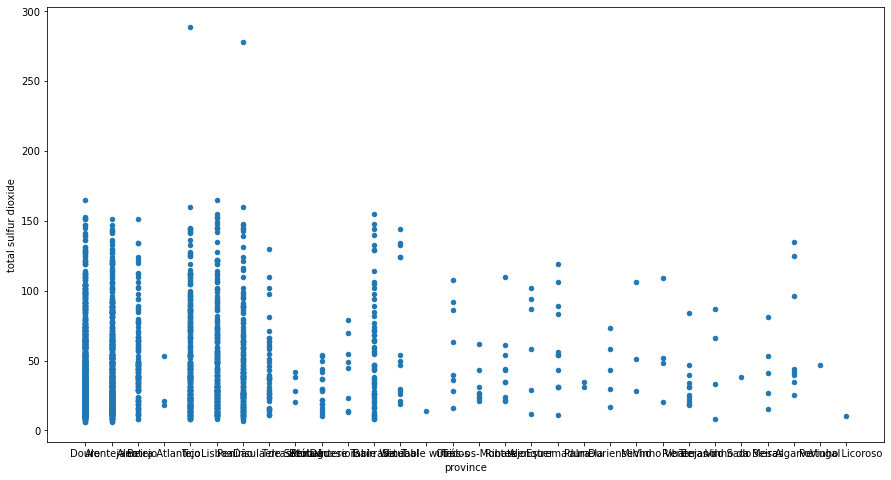

In [52]:
df.plot.scatter(x='province', y='total sulfur dioxide', rot=0, figsize = (15,8))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)